# Multiple linear regression #

Let's see how we can use multiple variables in a regression.

In [4]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


We need to remove the strange values again:

In [6]:
df = df[(df['price'] > 30000)] 

## Multiple linear regression ##

In [7]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

X = df[['area', 'year_built', 'rooms']] #we include three numerical variables.
y = df['price']

lm = LinearRegression() #this creates a new LR model


We need to train our model on the training data, and test it on the test data, to prevent overfitting. So first we need to split the data.

In [9]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = lm.fit(X_train, y_train) #this "fits" the model with the training data

Let's have a look at the coefficients.

In [10]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
4251.295299,area
-1141.852158,year_built
-16530.404794,rooms


* Per m2 the price goes up by 4251 euros
* Per year newer, the price goes down by 1142 euros
* Per extra room the price will go down by 16530

The last one may seem strange. But remember that area is correlated with rooms. A large house with many rooms will have a lot of surface area. The negative value for rooms is thus a "penalty" for houses with "too many" rooms for their surface area to be practical.

Let's create the predictions for the test data.

In [11]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions



## Evaluating the model ##

In [34]:
r2_score(y_test, y_test_p)

0.6450967327564048

In [35]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

101656.59508790272

64.5% of the variation in price can be explained by our model. We are off on average by 102 thousand euros. Let's look at the Y-Y' plot (actual vs. predicted).

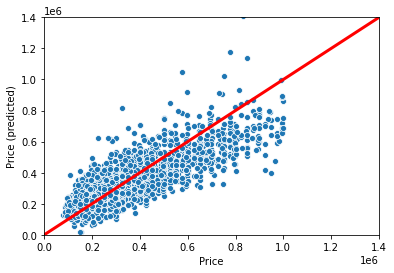

In [12]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

Cheap houses are predicted a bit too high and expensive houses too low.

On the whole, our model gives a rough indication but is not nearly good enough for a real estate broker or even average person to use.